### Stationarity Exercise

In [4]:
# import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# import random
import random

# set a random seed
random.seed(5)

* generate a NON stationary time-series

In [32]:
date = pd.to_datetime('1st of jan 2021')
date = date + pd.to_timedelta(np.arange(100), 'D')

random_data = pd.Series(np.random.random(100) * 10)
trend = pd.Series(np.arange(100))

random_trend = random_data + trend

df_non_stationary = pd.DataFrame({'random': random_trend.values}, index = date)
df_non_stationary

,random
2021-01-01,7.912402
2021-01-02,9.509056
2021-01-03,3.583155
2021-01-04,11.777529
2021-01-05,13.259290
...,...
2021-04-06,95.363080
2021-04-07,101.571627
2021-04-08,106.620225
2021-04-09,100.706417


* plot the NON stationary series generated above

<AxesSubplot:>

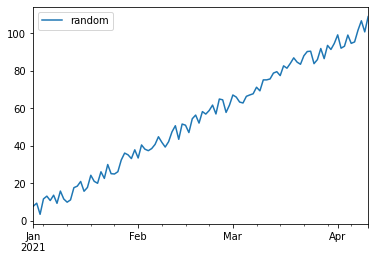

In [33]:
df_non_stationary.plot()

* generate a stationary time-series

In [31]:
date = pd.to_datetime('1st of jan 2021')
date = date + pd.to_timedelta(np.arange(100), 'D')

random_data = pd.Series(np.random.random(100) * 10)

df_stationary = pd.DataFrame({'random': random_data.values}, index = date)
df_stationary

,random
2021-01-01,1.818202
2021-01-02,0.695415
2021-01-03,4.575066
2021-01-04,2.014463
2021-01-05,9.121769
...,...
2021-04-06,2.107941
2021-04-07,4.703749
2021-04-08,8.176587
2021-04-09,7.695820


* plot the stationary series generated above

<AxesSubplot:>

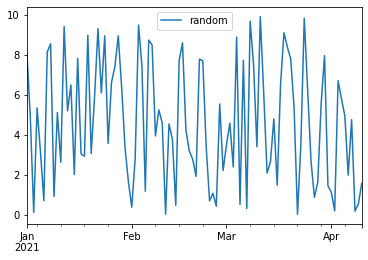

In [30]:
df.plot()

* Create a function `'ADF_Stationarity_Test'` with the input parameters `timeseries` and `significance_level` which: 
    * prints the adfuller test results
    * prints the conclusion stating whether timeseries is stationary based on the siginificance level (input parameter of function)


In [35]:
def ADF_Stationarity_Test(timeseries, significance_level):
    from statsmodels.tsa.stattools import adfuller
    result = adfuller(timeseries)
    p_value = result[1]
    if p_value >=significance_level:
        return 'Non-Stationary Time Series'
    else:
        return 'Stationary Time Series'

* Apply the function `'ADF_Stationarity_Test'` to find out whether the timeseries generated above are stationary.

In [37]:
ADF_Stationarity_Test(df_non_stationary, 0.05)

'Non-Stationary Time Series'

In [38]:
ADF_Stationarity_Test(df_stationary, 0.05)

'Stationary Time Series'

* Apply a suitable transformation to make the NON stationary time series stationary.

In [47]:
df_transformed = df_non_stationary.copy()
df_transformed = df_transformed.diff()

In [48]:
df_transformed

,random
2021-01-01,NaN
2021-01-02,1.596654
2021-01-03,-5.925901
2021-01-04,8.194374
2021-01-05,1.481761
...,...
2021-04-06,0.762740
2021-04-07,6.208547
2021-04-08,5.048599
2021-04-09,-5.913809


* plot the transformed time series

<AxesSubplot:>

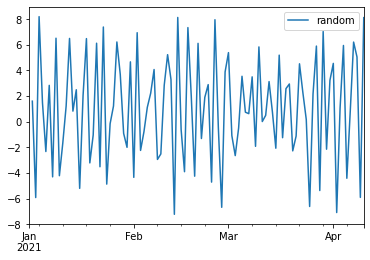

In [49]:
df_transformed.plot()

* Apply the function `'ADF_Stationarity_Test'` to find out whether the transformed timeseries is stationary.

In [51]:
ADF_Stationarity_Test(df_transformed[1:], 0.05)

'Stationary Time Series'